<a href="https://colab.research.google.com/github/nairsatish/4540/blob/master/logistic_regression_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining and visualizing data

   x1  x2  y
0   1   2  1
1   2   4  1
2   3   6  1
3   4   8  0
4   5  10  0
5   4   2  1


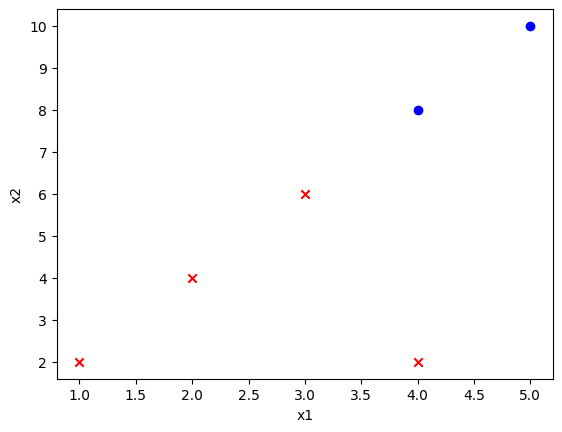

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

#some values for training data
data = {
  "x1": [1, 2, 3, 4, 5, 4],
  "x2": [2, 4, 6, 8, 10, 2],
  "y": [1, 1, 1, 0, 0, 1]
}

df = pd.DataFrame(data)
print(df)

#separate data into two frames depending on y
type1 = df[df['y'] == 1]
type0 = df[df['y'] == 0]

#plot
plt.scatter(type1['x1'], type1['x2'], marker='x', color='r')
plt.scatter(type0['x1'], type0['x2'], marker='o', color='b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


# Functions for logistic regression
- The number of features is n
- The number of samples is m
- Each feature is denoted as x_j
- The output variable is denoted as y
- i is the index of a sample in the training set
- x[i] is an (n+1)-length list of the features of the ith sample
- x[i][j] is the j'th feature of the i'th sample

Sorry for all the for loops. I'm not 100% on how to perform operations on whole sets

In [2]:
from math import e
from math import log

#the logistic function
def g(z):
  return 1/(1+pow(e, -z))

#returns the predicted value for an input given a hypothesis function
# theta = parameters = 1-dimensional set w/ length n+1
# x = 1-dimensional set w/ length n+1
def h(theta, x):
  n = len(theta)
  z = 0
  i = 0
  for i in range(n):
    z += theta[i] * x[i]
  return g(z)

#returns the cost of a hypothesis given one sample
# theta = parameters = 1-dimensional set w/ length n+1
# x = 1-dimensional set w/ length n+1
# y = an integer, 1 or 0
def cost(theta, x, y):
  try:
    c = -y*log(h(theta, x)) - (1-y)*log(1-h(theta, x))
  except ValueError: #this error occurs if h is 1 or 0.
    c = abs(h(theta, x) - y)
  return c

#returns the average cost for all samples with a given hypothesis
# theta = 1-dimensional set w/ length n+1
# x = 2d array
# y = 1-dimensional set w/ length m
def J(theta, x, y):
  sum = 0
  i = 0
  m = len(x)
  for i in range(m):
    sum += cost(theta, x.loc[i], y.loc[i])
  avg = sum / m
  return avg


# Evaluating hypothesis

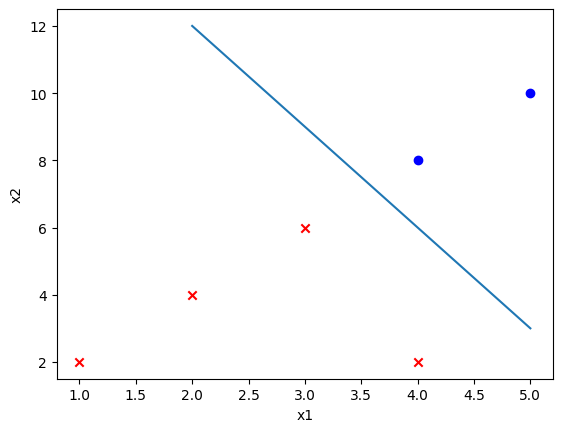

   x0  x1  x2  y         h
0   1   1   2  1  0.998499
1   1   2   4  1  0.982014
2   1   3   6  1  0.817574
3   1   4   8  0  0.268941
4   1   5  10  0  0.029312
5   1   4   2  1  0.880797
J: 0.11516760548235543


In [3]:
import numpy as np

#add x0 to data
m = len(data["x1"])
x0 = [1] * m
df["x0"] = x0

#some values for the parameters
theta = [9, -1.5, -.5]
#show the hypothesis line
#the decision boundary is the line where z = 0
hx = np.linspace(2, 5, 2)
hy = (theta[0] + theta[1]*hx) / -theta[2]
plt.plot(hx, hy)

#plot the original data
plt.scatter(type1['x1'], type1['x2'], marker='x', color='r')
plt.scatter(type0['x1'], type0['x2'], marker='o', color='b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#separate out x
x = df[['x0','x1','x2']]
#calculate h(x) for each x and add it to the dataframe
i=0
hypo=[]
for i in range(m):
  hypo.append(h(theta, x.loc[i]))
df['h'] = hypo
df = df[["x0",'x1','x2','y','h']]

#Show results
print(df)
print("J:", J(theta, x, df['y'])) #J